## Stats 211 Problem set 2

[Andrew Martin]

[Colleges Institutional Debts] 

[02/16/24]

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you?
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university
2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**

Hypothesis: States provide a greater amount of funding for students at universities that conduct a higher level of research. The dependent variable is
students receiving state grants and the indenpendent variable is a colleges research intensity. Given that university research is increasingly perceived and understood as producing products and actions that can aid a states operation and own budgets, I suspect that states will direct a higher amount of funding to universities that are conducting research as opposed to those that are not. 



### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [1]:
cd C:\Users\rabid\Desktop\01_Grad_Stats_II\soc211_assignments\week5

C:\Users\rabid\Desktop\01_Grad_Stats_II\soc211_assignments\week5


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Log for Research Assignment 2.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  C:\Users\rabid\Desktop\01_Grad_Stats_II\soc211_assignments\week5\L
> og for Research Assignment 2.log
  log type:  text
 opened on:  21 Feb 2024, 13:27:17


In [23]:
insheet using grants2015_college_affordability20200218.csv, clear

(8 vars, 581 obs)


In [24]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

In [25]:
ds

year          stabbr        hgroupstring  igrnt_low_~c  hgrouptemp
instnm        control       highdeg       sgrnt_low_~c  hgroup


QUESTION: How are we supposed to know [hgroupstring] is the variable group for "Level of Research at University"? Could not find a codebook that made this
clear?

QUESTION: How are we supposed to know how are running a control on the [hgroup] variable? Seemingly by selecting different states and finding a pattern
beyond just a single state would allow for control, but how do we demonstrate that we are doing that with the data? Is it already baked into the data
itself or is there a specific procedure that needs to be run that demonstrates there is no spurious occurence? Is there a confidence level for avoding
spuriousness?

In [26]:
label variable hgroup "Level of Research at University"
codebook hgroup


-------------------------------------------------------------------------------
hgroup                                          Level of Research at University
-------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: hgroup

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/581

            Tabulation: Freq.   Numeric  Label
                           34         1  Highest
                           37         2  Very high
                           72         3  High
                          438         4  Some/None


In [27]:
label variable igrnt_low_~c "% Loan Repayment"
codebook igrnt_low_~c


-------------------------------------------------------------------------------
igrnt_low_inc                                                  % Loan Repayment
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,60578.5]                   Units: 1.000e-06
         Unique values: 579                       Missing .: 0/581

                  Mean: 6965.15
             Std. dev.: 8034.53

           Percentiles:     10%       25%       50%       75%       90%
                        765.767   2079.92   4656.91   8337.64   15516.2


In [28]:
label variable sgrnt_low_~c "State Grant Aid Per Low Income Student"
codebook sgrnt_low_~c


-------------------------------------------------------------------------------
sgrnt_low_inc                            State Grant Aid Per Low Income Student
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [29]:
codebook hgroup


-------------------------------------------------------------------------------
hgroup                                          Level of Research at University
-------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: hgroup

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/581

            Tabulation: Freq.   Numeric  Label
                           34         1  Highest
                           37         2  Very high
                           72         3  High
                          438         4  Some/None


In [30]:
tab hgroup


   Level of |
Research at |
 University |      Freq.     Percent        Cum.
------------+-----------------------------------
    Highest |         34        5.85        5.85
  Very high |         37        6.37       12.22
       High |         72       12.39       24.61
  Some/None |        438       75.39      100.00
------------+-----------------------------------
      Total |        581      100.00


In [31]:
%head hgroup

,hgroup
1,Some/None
2,Some/None
3,High
4,High
5,Some/None


In [32]:
sum hgroup


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      hgroup |        581     3.57315    .8511059          1          4


In [33]:
describe hgroup


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
hgroup          long    %9.0g      hgroup     Level of Research at University


### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

QUESTION: It is unclear why I am unable to use the variable "sgrnt_low_inc" in some places but it works in others.
E.g. I can run "sgrnt_low_inc in places such as [bysort hgroup] but I am not able to run [gen sd_sgrnt_low]
as sgrnt_low_inc as it will inform me that that variable is not recognized.

QUESTION: The variable [sgrnt_low_inc] is being completely inconsistent when I use it. I have managed to get everything to work exactly once
[see obsidian screen capture] but after making a change it appears that the system is unable to duplicate the result.

In [34]:
label variable sgrnt_low "State Aid Per Low Income Student"

In [35]:
codebook sgrnt_low_inc


-------------------------------------------------------------------------------
sgrnt_low_inc                                  State Aid Per Low Income Student
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [36]:
collapse (mean) mn_sgrnt_low=sgrnt_low ///
(semean) se_sgrnt_low=sgrnt_low ///
, by(hgroup)

In [37]:
generate hisgrnt_low = mn_sgrnt_low + 1.96*se_sgrnt_low
generate losgrnt_low = mn_sgrnt_low - 1.96*se_sgrnt_low

In [38]:
%head

,hgroup,mn_sgrnt_low,se_sgrnt_low,hisgrnt_low,losgrnt_low
1,Highest,6340.64,1267.124,8824.202,3857.078
2,Very high,6196.042,1087.801,8328.132,4063.952
3,High,3874.735,484.8352,4825.012,2924.458
4,Some/None,3109.573,127.8609,3360.181,2858.966


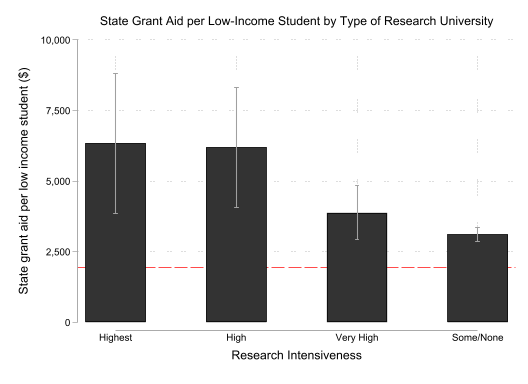

In [41]:
graph twoway (bar mn_sgrnt_low hgroup, barw(.5)) ///
(rcap hisgrnt_low losgrnt_low hgroup) , ///
xlabel( 1 "Highest" 2 "High" 3 "Very High" 4 "Some/None", noticks) ///
ytitle("State grant aid per low income student ($)") ///
ylabel(0(2500)10000, format(%10.0fc)) ///
xtitle("Research Intensiveness") legend(off) name(igrntbar, replace) ///
title("State Grant Aid per Low-Income Student by Type of Research University")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

The universities with highest and very high amounts of research have confidence intervals that overlap. Additionally, universities with some/none research do not have overlapping confidence intervals with universities that have a highest, higher, and very high research intensiveness. This suggests that universities receive little in the way of state grant aid per low income student. This also suggests that low income students are unlikely to receive state grant if attending universities that particpate in some/none research.

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [43]:
insheet using loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)
reg y_lo_inc_rpy netprice4lowincome

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc

      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------

### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?



1. The co-efficient for the independent variable is -.00117.
There is a negative relationship between low income loan repayment and net price.

2. The p-value for the independent variable is 0.007.
There is a high level of confidence in the estimated relationship.

3. The R-squared coefficient of determination is 0.215.
Only around 20% of variation in the dependent variable is caused by the independent variable.

4. The F ratio is 8.48.
Due to the F ratio being 8.48, and there being the probability value associated being 0.007, we can be confident about the R-squared estimate of 0.2148.

### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

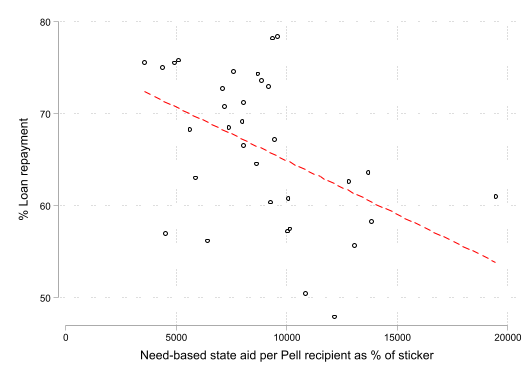

In [45]:
tw (scatter y_lo_inc_rpy netprice4lowincome) ///
(lfit y_lo_inc_rpy netprice4lowincome, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") legend(off) scheme(plotplainblind)